In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import interpolate
from numpy import sqrt
from scipy import optimize as opt
from numpy.linalg import norm
from numpy.linalg import inv
%matplotlib inline

In [2]:
a, b = 10, 200
count = 30
count_dist = 1000
random = 2000
y_offset = 60000

def plot_dist(x_dots, y_dots, x_line, y_line, title):
    plt.plot(x_dots, y_dots, 'bo', x_line, y_line)
    plt.title(title)

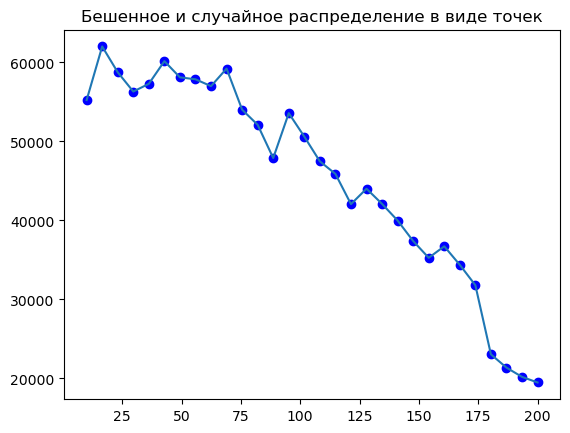

In [3]:
x = np.linspace(a, b, count)
y = -x**2 + np.random.randn(len(x)) * random + y_offset
plot_dist(x, y, x, y, 'Бешенное и случайное распределение в виде точек')

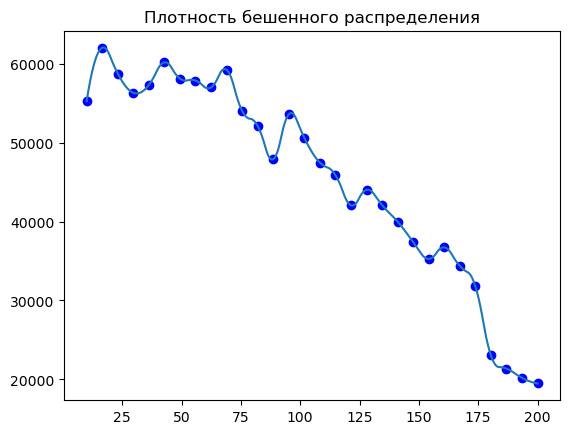

In [4]:
f = interpolate.interp1d(x, y, kind='quadratic')
x_dist = np.linspace(a, b, count_dist)
y_dist = f(x_dist)
plot_dist(x, y, x_dist, y_dist, 'Плотность бешенного распределения')

In [5]:
def error_cycle(w):
    sum = (((w[0] + w[1] * x + w[2] * x**2) - y)**2).sum()
    return sum

In [6]:
%timeit opt.minimize(error_cycle, (0,0,0)).x
w_cycle = opt.minimize(error_cycle, (0,0,0)).x
print (w_cycle)
y_cycle = w_cycle[0] + w_cycle[1] * x + w_cycle[2] * x**2

19.6 ms ± 392 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
[ 5.84049853e+04  3.86003026e+01 -1.19944418e+00]


In [7]:
x_m = np.matrix(np.asarray([np.full((count_dist,), 1), x_dist, x_dist**2]).transpose())
y_m = np.matrix(np.asarray(y_dist).reshape(count_dist,1))

In [8]:
def error_mat(w_m1):
    return norm(x_m * np.matrix(w_m1.reshape(len(w_m1),1)) - y_m)

In [9]:
%timeit opt.minimize(error_mat, np.matrix(np.asarray((0,0,0)).reshape(x_m.shape[1],1)), method = 'BFGS').x

w_mat = opt.minimize(error_mat, np.matrix(np.asarray((0,0,0)).reshape(x_m.shape[1],1)), method = 'BFGS').x
print(w_mat)
y_mat = x_m * w_mat.reshape(len(w_mat),1)

<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: Depreca

29.5 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
[ 5.93056530e+04  2.34976243e+01 -1.14609287e+00]


<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
<magic-timeit>:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
C:\Users\Oleg\AppData\Local\Temp\ipykernel_10760\2253022638.py:3: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be r

In [10]:
%timeit np.linalg.inv(x_m.T * x_m) * x_m.T * y_m

w_an1 = np.linalg.inv(x_m.T * x_m) * x_m.T * y_m
print(w_an1)
y_an1 = x_m * w_an1.reshape(len(w_an1),1)

92.8 µs ± 955 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[[ 5.93056910e+04]
 [ 2.34968806e+01]
 [-1.14608980e+00]]


In [13]:
%timeit np.linalg.solve(x_m.T * x_m, x_m.T * y_m)

w_an2 = np.linalg.solve(x_m.T * x_m, x_m.T * y_m)
print(w_an2)
y_an2 = x_m * w_an2.reshape(len(w_an2),1)

33.9 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[[ 5.93056910e+04]
 [ 2.34968806e+01]
 [-1.14608980e+00]]


In [11]:
%timeit np.dot(np.dot(inv(np.dot(x_m.T, x_m)),x_m.T),y_m)

w_an3 = np.dot(np.dot(inv(np.dot(x_m.T, x_m)),x_m.T),y_m)
print(w_an3)
y_an3 = x_m * w_an3.reshape(len(w_an3),1)

23.4 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[[ 5.93056910e+04]
 [ 2.34968806e+01]
 [-1.14608980e+00]]


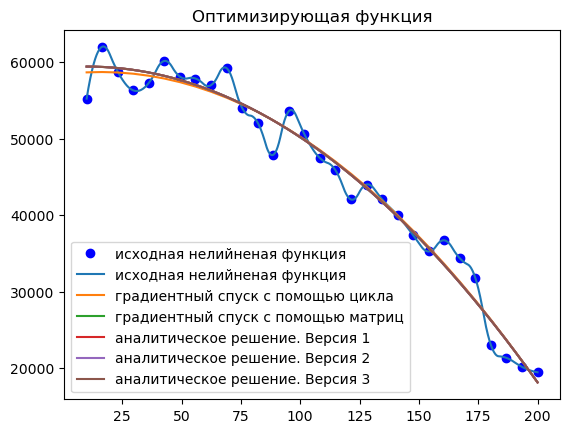

In [14]:
plt.plot(x, y, 'bo', x_dist, y_dist, label = 'исходная нелийненая функция')
plt.plot(x, y_cycle, label = 'градиентный спуск с помощью цикла')
plt.plot(x_dist, y_mat, label = 'градиентный спуск с помощью матриц')
plt.plot(x_dist, y_an1, label = 'аналитическое решение. Версия 1')
plt.plot(x_dist, y_an2, label = 'аналитическое решение. Версия 2')
plt.plot(x_dist, y_an3, label = 'аналитическое решение. Версия 3')
plt.title('Оптимизирующая функция')
plt.legend()
plt.show()

In [16]:
a=[1,2]